# BASIC MATHEMATICS FOR MACHINE LEARNING

## SciPy application for function minimization:
## Gradient vs. Non-Gradient optimization methods

You will need:
+ numpy
+ scipy
+ matplotlib

Understanding the global optimization problem and the differences between gradient methods and non-gradient methods is very useful in data analysis problems, in particular, for selecting algorithm parameters.

In this example, we will see how to solve optimization problems using the SciPy library. First, let’s solve the problem related to finding the function minimum using one of the Gradient optimization methods. Then, we will see the differences in the Gradient method and one of the Global optimization methods. In conclusion, we will find the global minimum of a non-smooth function, i.e. a function whose gradient is not always defined.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Smooth Function Minimize

In [2]:
# Consider the function in the interval 
def f(x):
    return np.sin(x/5)*np.exp(x/10) + 5*np.exp((-x)/2)

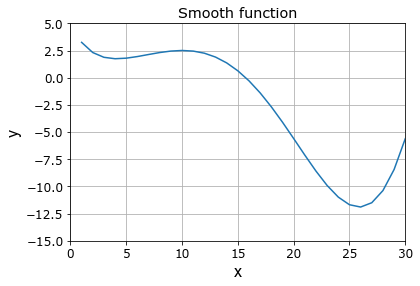

In [3]:
mpl.rc('font', family='Verdana', size= 12)
fig, ax = plt.subplots(figsize=(6,4))

x = np.arange(1.,31.)
ax.axis([0., 30., -15., 5.])
ax.grid()
plt.title('Smooth function')
ax.plot(x, f(x), label = 'f(x)')
ax.set_xlabel(u'x',{'fontname':'Arial', 'size': 16})
ax.set_ylabel(u'y',{'fontname':'Arial', 'size': 16})
plt.show()

### 1.1. Local Minimization

Let's find the minimum using the standard parameters in the scipy.optimize.minimize function (i.e., specifying the initial approximation, method as a BFGS (one of the most accurate in the majority of cases, the gradient methods of optimization).

In [4]:
# 1) initial approximation x = 2
from scipy.optimize import minimize
x01 = 2.                                  # initial approximation
res1 = minimize(f, x01, method='BFGS') 
min1 = res1.x

# 2) initial approximation x = 30
x02 = 30.
res2 = minimize(f, x02, method='BFGS')
min2 = res2.x
print(f'function minimum when x0=2: {min1};  number of itterations: {res1.nfev}') 
print(f'function minimum when x0=30: {min2};  number of itterations: {res2.nfev}') 

function minimum when x0=2: [4.13627619];  number of itterations: 21
function minimum when x0=30: [25.880193];  number of itterations: 21


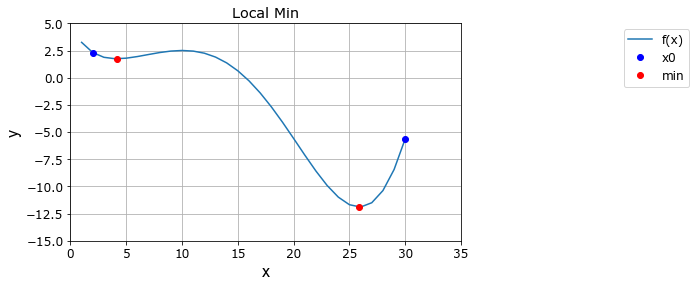

In [5]:
mpl.rc('font', family='Verdana', size= 12)
fig, ax = plt.subplots(figsize=(7,4))

x = np.arange(1.,31.)
ax.axis([0., 35., -15., 5.])
ax.grid()
ax.plot(x, f(x), label = 'f(x)')
ax.set_xlabel(u'x',{'fontname':'Arial', 'size': 16})
ax.set_ylabel(u'y',{'fontname':'Arial', 'size': 16})
plt.title('Local Min')
plt.plot([x01, x02], [f(x01), f(x02)], 'bo',label = 'x0')
plt.plot([min1, min2], [res1.fun, res2.fun], 'ro', label = 'min')

ax.legend(bbox_to_anchor=(1.6, 1.))
plt.show()


The differential evolution coped with the task of finding a global minimum on the interval, because its structure involves the fight against getting into local minimums.
Comparing the number of iterations (nfev) required by the BFGS to find the minimum with good initial approximation, with the number of iterations required by differential evolution:
in BFGS it is much smaller. In addition, the operating time of differential evolution grows very rapidly with an increase in the number of function arguments.

The answer is different depending on the initial approximation. In fact, gradient methods usually do not solve the problem of global optimization, so the results are the expected and quite correct.

### 1.2. Global Optimization

Now let’s apply the global optimization method - differential evolution, specifying just a function and interval.

In [6]:
from scipy.optimize import differential_evolution

bounds = [(1, 30)]  # list of tuples!
result = differential_evolution(f, bounds)
result.x, result.fun
print(f'function minimum: {result.x};  number of itterations: {result.nfev}') 

function minimum: [25.88019342];  number of itterations: 81


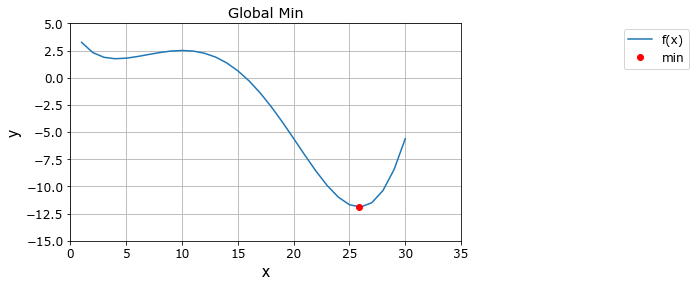

In [7]:
mpl.rc('font', family='Verdana', size= 12)
fig, ax = plt.subplots(figsize=(7,4))

x = np.arange(1.,31.)
ax.axis([0., 35., -15., 5.])
ax.grid()
ax.plot(x, f(x), label = 'f(x)')
ax.set_xlabel(u'x',{'fontname':'Arial', 'size': 16})
ax.set_ylabel(u'y',{'fontname':'Arial', 'size': 16})
plt.title('Global Min')
plt.plot([result.x], [result.fun], 'ro', label = 'min')

ax.legend(bbox_to_anchor=(1.6, 1.))
plt.show()

The differential evolution coped with the task of finding a global minimum on the interval, because its structure involves the fight against getting into local minimums.

## 2. Non-smooth Function Minimize

Now we consider the function h(x) = int(f(x)) on the same interval [1, 30].
This function will be non-smooth and even discontinuous, and her diagramm will have a stepped form.

In [8]:
from math import exp, sin
def h(x):
    return int(sin(x/5)*exp(x/10) + 5*exp((-x)/2))

In [9]:
xi = list(range(1,31))
z = ([h(x) for x in range(1,31)])

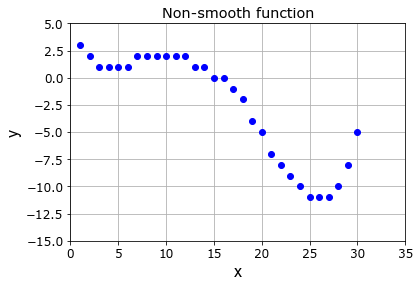

In [10]:
mpl.rc('font', family='Verdana', size= 12)
fig, ax = plt.subplots(figsize=(6,4))

ax.axis([0., 35., -15., 5.])
ax.grid()
plt.title('Non-smooth function')
plt.plot(xi, z, 'bo', label = None)
ax.set_xlabel(u'x',{'fontname':'Arial', 'size': 16})
ax.set_ylabel(u'y',{'fontname':'Arial', 'size': 16})

plt.show()

### 2.1. Local Optimization

Let’s use the same methods of local minimization, trying to find the minimum of the function h(x) using BFGS.

In [11]:
from scipy.optimize import minimize

x01 =2.
res1 = minimize(h, x01, method='BFGS')
x02 =30.
res2 = minimize(h, x02, method='BFGS')
print(f'function minimum when x0=2: {res1.x};  number of itterations: {res1.nfev}')
print(f'function minimum when x0=30: {res2.x};  number of itterations: {res2.nfev}')

function minimum when x0=2: [2.];  number of itterations: 3
function minimum when x0=30: [30.];  number of itterations: 3


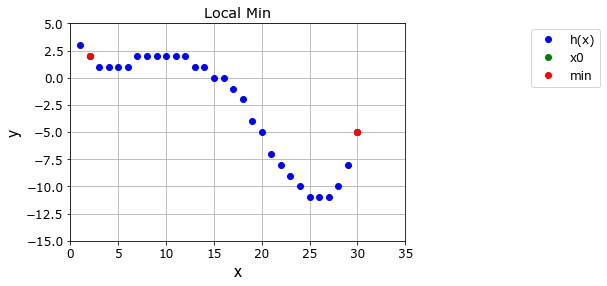

In [12]:
mpl.rc('font', family='Verdana', size= 12)
fig, ax = plt.subplots(figsize=(6,4))

ax.axis([0., 35., -15., 5.])
ax.grid()
plt.title('Local Min')
plt.plot(xi, z, 'bo', label = 'h(x)')
plt.plot([x01, x02], [h(x01), h(x02)], 'go',label = 'x0')
plt.plot([res1.x, res2.x], [res1.fun, res2.fun], 'ro', label = 'min')
ax.set_xlabel(u'x',{'fontname':'Arial', 'size': 16})
ax.set_ylabel(u'y',{'fontname':'Arial', 'size': 16})
ax.legend(bbox_to_anchor=(1.6, 1.))
plt.show()

BFGS uses a gradient and clearly, it is not suitable for minimizing of discontinuous function

### 2.2. Global Optimization

In [13]:
from scipy.optimize import differential_evolution

bounds = [(1, 30)]
result = differential_evolution(h, bounds)
result.x, result.fun
print(f'function minimum: {result.x};  number of itterations: {result.nfev}')

function minimum: [26.33303883];  number of itterations: 92


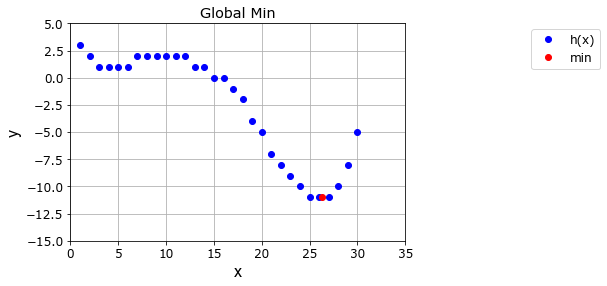

In [14]:
mpl.rc('font', family='Verdana', size= 12)
fig, ax = plt.subplots(figsize=(6,4))

ax.axis([0., 35., -15., 5.])
ax.grid()
plt.title('Global Min')
plt.plot(xi, z, 'bo', label = 'h(x)')
plt.plot([result.x], [result.fun], 'ro', label = 'min')
ax.set_xlabel(u'x',{'fontname':'Arial', 'size': 16})
ax.set_ylabel(u'y',{'fontname':'Arial', 'size': 16})
ax.legend(bbox_to_anchor=(1.6, 1.))
plt.show()

The method of differential Evolution works with both smooth and non-smooth functions.